# Data manipulation using `pandas`

This notebook generously borrows from [Python data science handbook](https://jakevdp.github.io/PythonDataScienceHandbook/). 

Some other useful resources are
+ [Python for Data Analysis](https://catalog.lib.ncsu.edu/catalog/NCSU2739191) written by the creator of `pandas`.
+ [Pydata tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)
+ [Pandas cookbook](https://tutswiki.com/pandas-cookbook/) which explains pandas using realworld datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Installation
As before, you can try `pip install pandas` or `conda install -c anaconda pandas`.

### What is `pandas`?

`pandas` is built on top of `numpy` with more convenient tools for data manipulation. Here are a few features
+ Offers more flexibility: handling missing data and adding labels to data. 
+ Robust support of i/o
+ slicing, fancy indexing, and subsetting of large data sets
+ Time series specific functionalities 


There are a few important data structures in `pandas`
1. `Series`
2. `DataFrame`
3. `Index`

## Series 

A `Series` is like a 1-Dimensional array with flexible indices.

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
print('The values are \n', data.values)
print(data.keys())

The values are 
 [0.25 0.5  0.75 1.  ]
Index(['a', 'b', 'c', 'd'], dtype='object')


So far, a `Series` looks like a dictionary. However, we can use more sophisticated techniques to look up values.

In [3]:
data['a']         #Looks up the value of a certain key

0.25

In [4]:
data[0:2]

a    0.25
b    0.50
dtype: float64

In [5]:
data['a':'c']     #Looks up the values corresponding to the keys 'a', 'b', 'c'

a    0.25
b    0.50
c    0.75
dtype: float64

In [6]:
data[data > 0.55]

c    0.75
d    1.00
dtype: float64

### Different ways of constructing a `Series`

In general, constructing a series is some variation of 

```
db = pd.Series(data, index = index)
```

where `data` is a list or an NumPy array. 

In [7]:
pd.Series(['a', 123, 4.2])

0      a
1    123
2    4.2
dtype: object

In [8]:
pd.Series(np.random.rand(5), index = np.array([2,3,16,17,49]))

2     0.962137
3     0.962057
16    0.062242
17    0.694931
49    0.985337
dtype: float64

### Operations on series

In [9]:
print('data is ' + str(data))
data*2

data is a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64


a    0.5
b    1.0
c    1.5
d    2.0
dtype: float64

In [10]:
data + data

a    0.5
b    1.0
c    1.5
d    2.0
dtype: float64

In [11]:
data**2.

a    0.0625
b    0.2500
c    0.5625
d    1.0000
dtype: float64

## DataFrame

A `DataFrame` is an analog of a two-dimensional array with both flexible row indices and flexible column names. 

In [12]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [13]:

population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135,
                  'North Carolina': 11000000}
population = pd.Series(population_dict)
population

California        38332521
Texas             26448193
New York          19651127
Florida           19552860
Illinois          12882135
North Carolina    11000000
dtype: int64

In [14]:
states = pd.DataFrame({'area':area, 'population':population})
states

,area,population
California,423967.0,38332521
Florida,170312.0,19552860
Illinois,149995.0,12882135
New York,141297.0,19651127
North Carolina,NaN,11000000
Texas,695662.0,26448193


The `index` and `columns` are the labels associated with the rows and columns of this `DataFrame`.

In [15]:
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'North Carolina',
       'Texas'],
      dtype='object')

In [16]:
states.columns

Index(['area', 'population'], dtype='object')

In [17]:
states.values

array([[  423967., 38332521.],
       [  170312., 19552860.],
       [  149995., 12882135.],
       [  141297., 19651127.],
       [      nan, 11000000.],
       [  695662., 26448193.]])

In [18]:
states['area']

California        423967.0
Florida           170312.0
Illinois          149995.0
New York          141297.0
North Carolina         NaN
Texas             695662.0
Name: area, dtype: float64

`describe` gives a quick summary of your `DataFrame`.

In [19]:
states.describe()

,area,population
count,5.000000,6.000000e+00
mean,316246.600000,2.131114e+07
std,242437.411951,9.993314e+06
min,141297.000000,1.100000e+07
25%,149995.000000,1.454982e+07
50%,170312.000000,1.960199e+07
75%,423967.000000,2.474893e+07
max,695662.000000,3.833252e+07


We can transpose and sort our dataset

In [20]:
states.T

,California,Florida,Illinois,New York,North Carolina,Texas
area,423967.0,170312.0,149995.0,141297.0,NaN,695662.0
population,38332521.0,19552860.0,12882135.0,19651127.0,11000000.0,26448193.0


In [21]:
states.sort_values('area')     # Sort by area

,area,population
New York,141297.0,19651127
Illinois,149995.0,12882135
Florida,170312.0,19552860
California,423967.0,38332521
Texas,695662.0,26448193
North Carolina,NaN,11000000


In [22]:
states.sort_values('population')

,area,population
North Carolina,NaN,11000000
Illinois,149995.0,12882135
Florida,170312.0,19552860
New York,141297.0,19651127
Texas,695662.0,26448193
California,423967.0,38332521


### Selection

We can select columns as we would in a dictionary. There are two methods `loc` and `iloc` for selecting rows/columns from the DataFrame.  

In [23]:
states['area']

California        423967.0
Florida           170312.0
Illinois          149995.0
New York          141297.0
North Carolina         NaN
Texas             695662.0
Name: area, dtype: float64

In [24]:
states.iloc[:3]

,area,population
California,423967.0,38332521
Florida,170312.0,19552860
Illinois,149995.0,12882135


In [25]:
states.iloc[2:4,:]

,area,population
Illinois,149995.0,12882135
New York,141297.0,19651127


In [26]:
states.loc['California':'New York', 'population']

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Name: population, dtype: int64

## Handling real-world  data


This portion of the notebook closely follows this [tutorial](https://tutswiki.com/pandas-cookbook/chapter2/). We will work with a subset of the of 311 service requests from NYC Open Data. You can download the csv file [here](311-service-requests.csv). 

In [27]:
complaints = pd.read_csv('311-service-requests.csv')

/Users/arvindks/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


What is in this dataset?

In [28]:
complaints.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

In [29]:
complaints.iloc[:15,0:8]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant
6,26595682,10/31/2013 01:46:40 AM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk
7,26595195,10/31/2013 01:44:19 AM,10/31/2013 01:58:49 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant
8,26590540,10/31/2013 01:44:14 AM,10/31/2013 02:28:04 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant
9,26594392,10/31/2013 01:34:41 AM,10/31/2013 02:23:51 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant


In [30]:
complaints['Created Date'][0]

'10/31/2013 02:08:41 AM'

Note that the missing values are handled by NaN (not a number). 

### Exploring this dataset

Let us look at the type of complaints and try to answer these questions:
1. What are the top 10 complaints?
2. How many complaints involves rodents?
3. Which borough has the most number of rodent complaints?
4. Plot the latitude/longitudes of all the rodent complaints. Compare these with all the locations of all the complaints.

In [31]:
complaints['Complaint Type']

0         Noise - Street/Sidewalk
1                 Illegal Parking
2              Noise - Commercial
3                 Noise - Vehicle
4                          Rodent
                   ...           
111064    Maintenance or Facility
111065            Illegal Parking
111066    Noise - Street/Sidewalk
111067         Noise - Commercial
111068           Blocked Driveway
Name: Complaint Type, Length: 111069, dtype: object

1. To find out the top ten complaints, we use the `value_counts' method.

In [32]:
complaints['Complaint Type'].value_counts()[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

In [33]:
# Bottom 10 complaints
complaints['Complaint Type'].value_counts()[-10:]

DWD                               1
Stalled Sites                     1
Snow                              1
Ferry Permit                      1
Highway Sign - Damaged            1
DHS Income Savings Requirement    1
X-Ray Machine/Equipment           1
Tunnel Condition                  1
Open Flame Permit                 1
Municipal Parking Facility        1
Name: Complaint Type, dtype: int64

<AxesSubplot:>

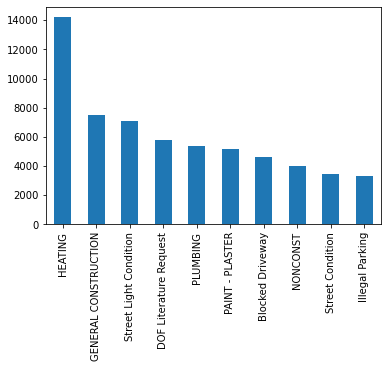

In [34]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts[:10].plot(kind='bar')

2. How many complaints involve rodents?

In [35]:
print('The number of incidents involving rodents are ', complaint_counts['Rodent'])

The number of incidents involving rodents are  1632


3. Which Borough has the most number of rodent complaints?

In [36]:
ind_rodent = complaints['Complaint Type'] == 'Rodent'


#print(comptype)
#print(np.argwhere(comptype=='Rodent'))
#ind_rodent = np.argwhere(comptype == 'Rodent').flatten()
ind_rodent

0         False
1         False
2         False
3         False
4          True
          ...  
111064    False
111065    False
111066    False
111067    False
111068    False
Name: Complaint Type, Length: 111069, dtype: bool

In [37]:
borough = complaints['Borough']
borough[ind_rodent]

4         MANHATTAN
14         BROOKLYN
104       MANHATTAN
113        BROOKLYN
119        BROOKLYN
            ...    
107712    MANHATTAN
107713    MANHATTAN
107715       QUEENS
107716     BROOKLYN
107733     BROOKLYN
Name: Borough, Length: 1632, dtype: object

<AxesSubplot:ylabel='Borough'>

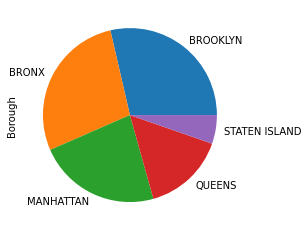

In [38]:
bor_rod_counts = borough[ind_rodent].value_counts()
bor_rod_counts.plot(kind = 'pie')

4. Plot the x-y coordinates of the rodent coordinates

Text(0, 0.5, 'Longitude')

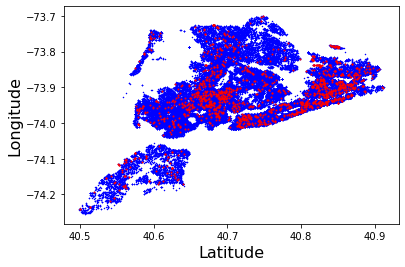

In [39]:
xloc = complaints['Latitude']
yloc = complaints['Longitude']

import matplotlib.pyplot as plt
plt.plot(xloc.values, yloc.values, 'bs', markersize=0.5)
plt.plot(xloc.values[ind_rodent], yloc.values[ind_rodent], 'r.', markersize=2.0)
plt.xlabel('Latitude', fontsize = 16)
plt.ylabel('Longitude', fontsize = 16)